## Vancouver Crime Data

### Intorduction

This dataset was obtained from the Vancouver Police Department. This dataset contains the records of crimes committed in various neighbourhoods of Vancouver. It contains factors such as the type of crime (theft, mischief, etc.), date, time and the location where the crime was committed.<br> Using the techniques learnt in STAT 201, we will try to analyse a relationship between the volume of crime committed at 2 different neighbourhoods (these neighbourhoods differ in terms of population density and average income of the people living there). We will compare the average amount of crime committed in these 2 areas and also the proportion of violent crimes. This will help us determine whether or not we can establish a relationship between the amount of crime and population density and income level. Initially, our hypothesis is that higher density areas where the annual income of people is low will tend to be more dangerous (more crime) than areas with low population density and higher annual incomes. Furthermore, we hypothesize that these areas have a higher proportion of violent crimes. 


## Preliminary Results

Loading data and required packages

In [46]:
# installing required packages
install.packages("skimr")
install.packages("GGally")
install.packages("tidyverse")
install.packages("repr")
install.packages("tidymodels")
install.packages("ggplot2")
install.packages("RCurl")
install.packages("see")

Warning message:
"package 'skimr' is in use and will not be installed"
Warning message:
"package 'GGally' is in use and will not be installed"
Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'repr' is in use and will not be installed"
Warning message:
"package 'tidymodels' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'RCurl' is in use and will not be installed"
Warning message:
"package 'see' is in use and will not be installed"


In [47]:
# installing libraries

library(tidyverse)
library(repr)
library(GGally)
library(tidymodels)
library(skimr)
library(ggplot2)
library(RCurl)
library(dplyr)
library(see)

In [5]:
# reading file from github

url <- "https://raw.githubusercontent.com/Utsav02/VancouverCrimeSTAT201/main/crimedata_csv_AllNeighbourhoods_AllYears.csv"

vancouver_crime <- read.csv(url)

Tidying data according to our use

In [6]:
# not selecting 2022 as it is the present year
vancouver_crime <- vancouver_crime %>%
filter(YEAR != 2022) %>%
select(TYPE, YEAR, NEIGHBOURHOOD)

# crimes that do not have any neighbourhoods mentioned
vancouver_crime[vancouver_crime == ""] <- "Neighbourhood Missing"

Data at a glace (Neighbourhoods and Type of Crime)

In [7]:
tidy_data <- vancouver_crime %>%
group_by(TYPE,NEIGHBOURHOOD) %>%
summarize(Count = n())%>%
pivot_wider(names_from = TYPE, 
values_from = Count)

tidy_data


`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Arbutus Ridge,385,1981,3,1137,333,1501,2315,244,540,5,368
Central Business District,12411,4103,67,25002,20322,69745,66812,9168,4617,49,4040
Dunbar-Southlands,337,2211,1,1648,385,1233,3636,337,675,4,354
Fairview,4216,4150,4,4359,1844,13131,14832,4442,2237,15,1421
Grandview-Woodland,2741,5104,19,6415,5806,9451,9876,1888,3589,10,1483
Hastings-Sunrise,1144,3737,14,3910,2116,4734,8027,545,2789,19,1553
Kensington-Cedar Cottage,1575,4715,18,4920,3346,8109,9779,1225,3239,19,1895
Kerrisdale,438,2258,2,1302,354,1532,3491,255,618,9,568
Killarney,457,2351,12,2147,1194,1933,4942,274,1451,17,719


Extracting data of West End and West Point Grey

In [21]:
# two neighbourhoods we are comparing

westpoint_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West Point Grey")

westend_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West End")

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


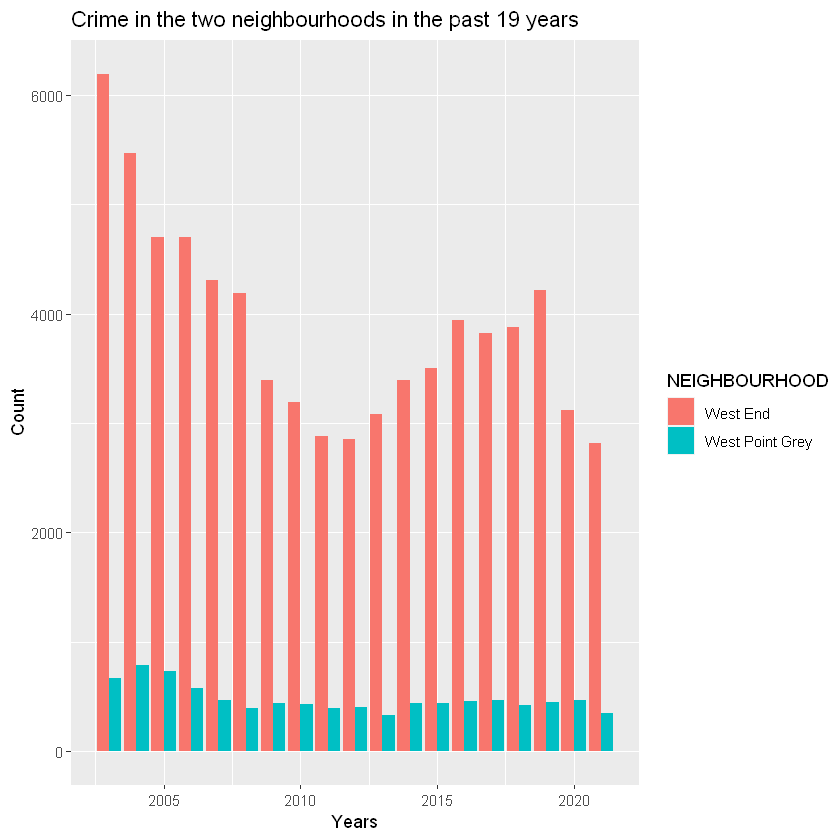

In [22]:
# comparing the two neighbourhoods
compare_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "West Point Grey") %>%
group_by(YEAR, NEIGHBOURHOOD) %>%
summarise(Count = n())

compare_plot <- compare_crime %>%
ggplot(aes(x = YEAR, y = Count, fill = NEIGHBOURHOOD)) +
geom_bar(stat = "identity", position = "dodge") +
labs(x = "Years", title = "Crime in the two neighbourhoods in the past 19 years")
compare_plot

From the plot we can make the conclusion that there is less crime in West Point Grey than West End.

Violent Crimes:<br>
We thought to compare the number of violent crimes ("Homicide", "Vehicle Collision or Pedestrian Struck (with Fatality)" and "Offence Against a Person") and the proportion they make for each neighbourhood.

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


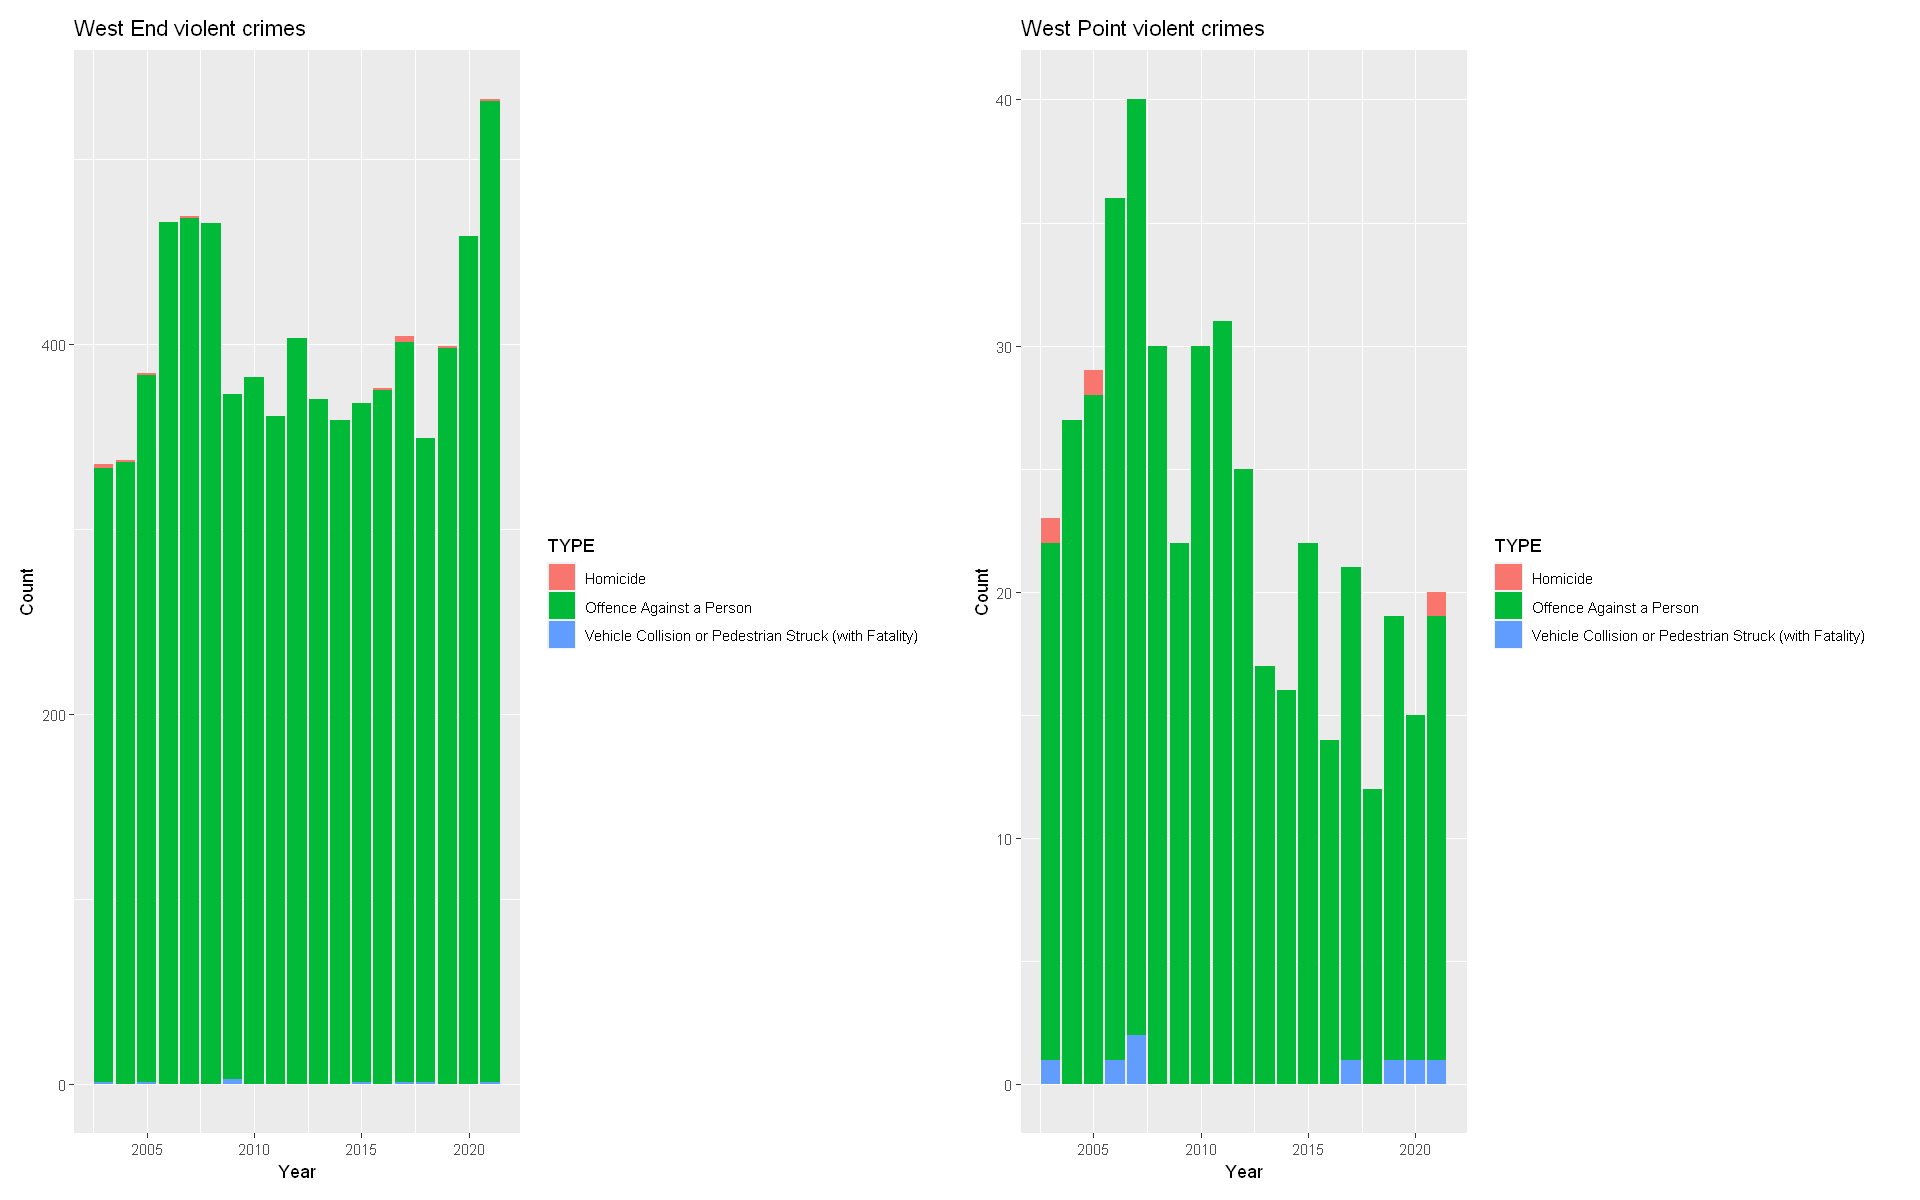

In [40]:
violent_crimes <- vancouver_crime %>%
filter(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")


westend_violent <- violent_crimes %>%
filter(NEIGHBOURHOOD == "West End")

westpoint_violent <- violent_crimes %>%
filter(NEIGHBOURHOOD == "West Point Grey")

westend_violent_plot <- westend_violent %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity") + 
labs(x = "Year", title = "West End violent crimes")

westpoint_violent_plot <- westpoint_violent %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity")+ 
labs(x = "Year", title = "West Point violent crimes")

options(repr.plot.width = 16, repr.plot.height= 10)
plots(westend_violent_plot, westpoint_violent_plot)


Bootstrapping to find mean crimes in a year for both neighbourhoods

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.
Setting `type = "bootstrap"` in `generate()`.

Setting `type = "bootstrap"` in `generate()`.



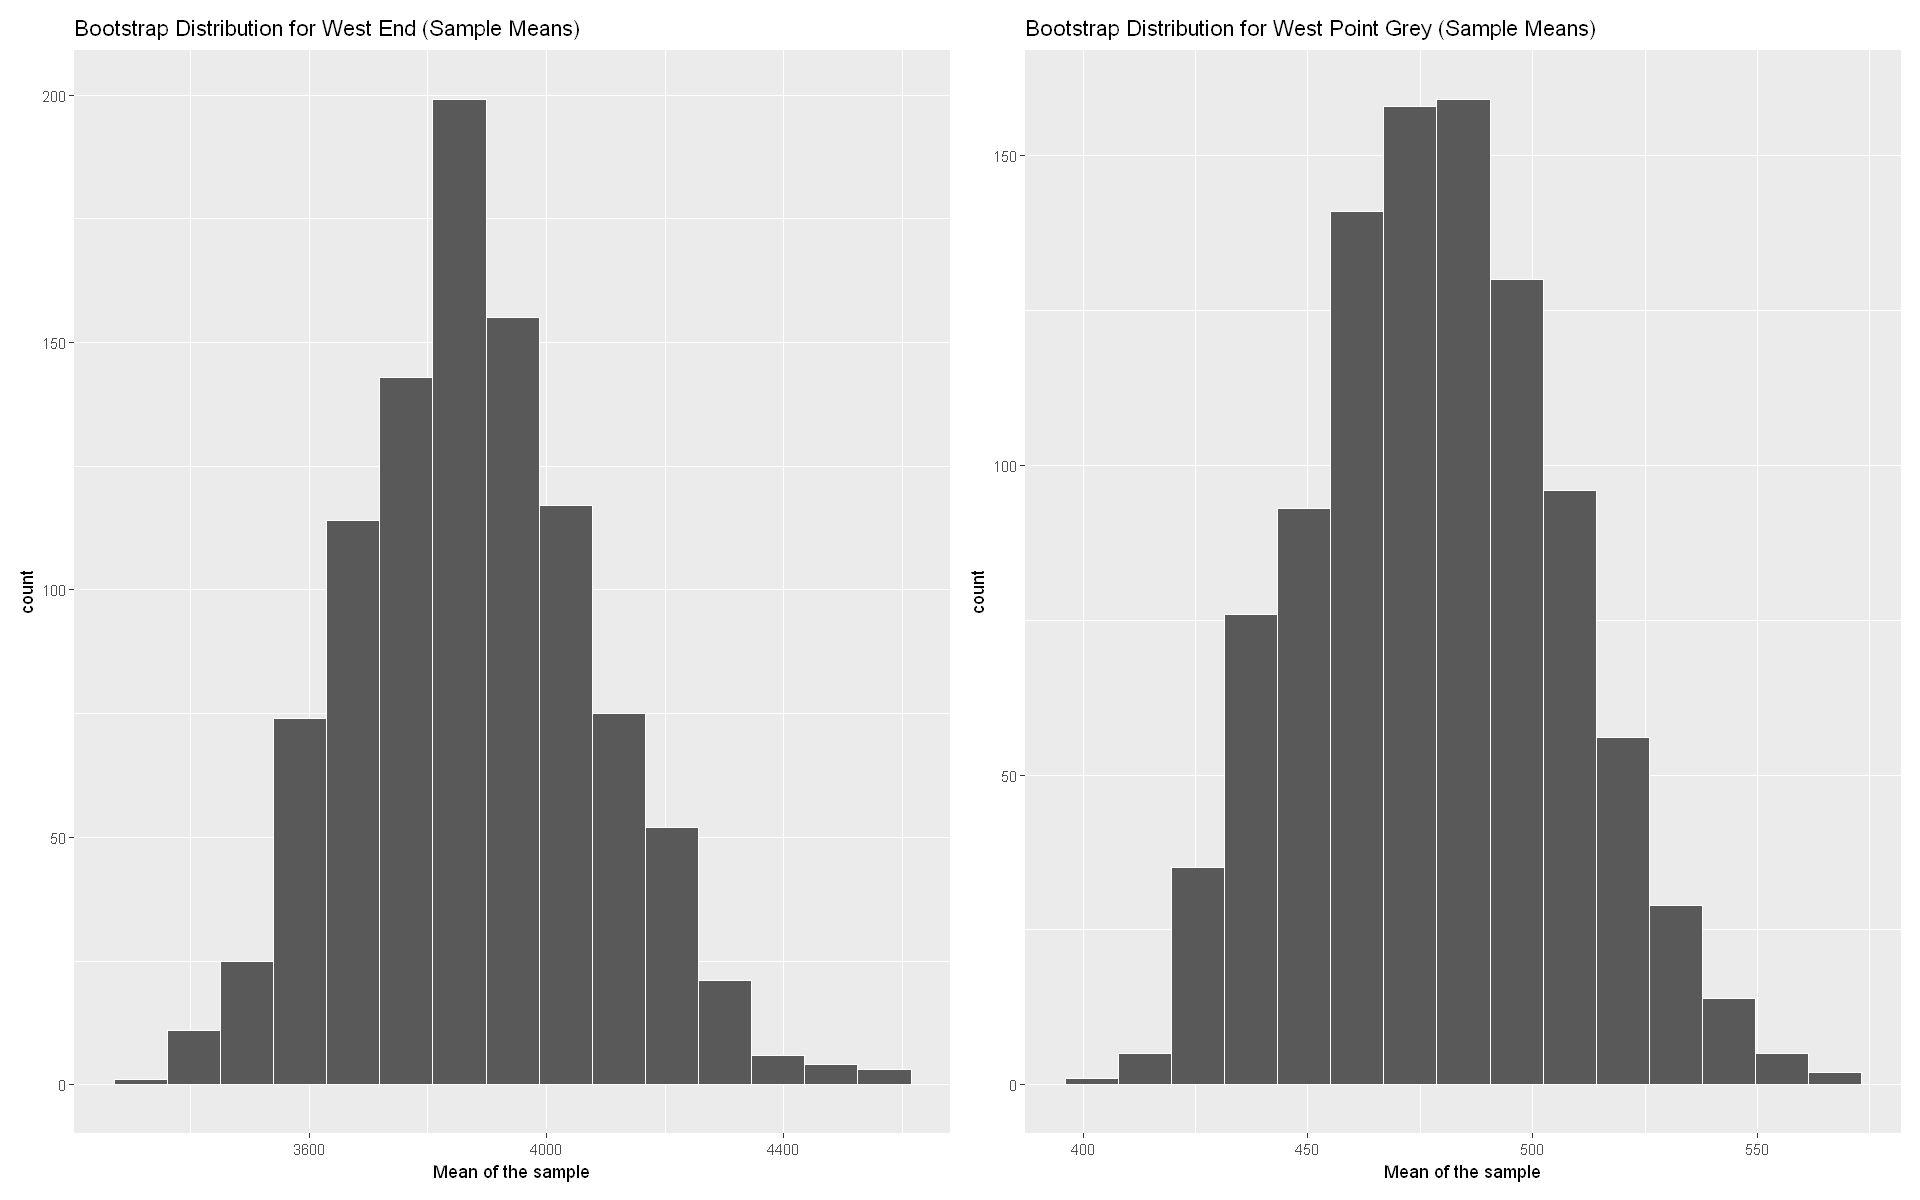

In [41]:
neighbourhood_year_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD, YEAR) %>%
summarize(Count = n()) 

westend_crime_sample <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End") %>%
specify(response = Count) %>%
generate(reps = 1000) %>%
calculate(stat = "mean") 

westend_crime_sample_plot <- visualise(westend_crime_sample)+
labs(title = "Bootstrap Distribution for West End (Sample Means)", x = "Mean of the sample")

westpoint_crime_sample <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West Point Grey") %>%
specify(response = Count) %>%
generate(reps = 1000) %>%
calculate(stat = "mean") 

westpoint_crime_sample_plot <- visualise(westpoint_crime_sample) +
labs(title = "Bootstrap Distribution for West Point Grey (Sample Means)", x = "Mean of the sample")

plots(westend_crime_sample_plot,westpoint_crime_sample_plot)

Bootstrapping to find proportions of violent crims for each neighbourhood

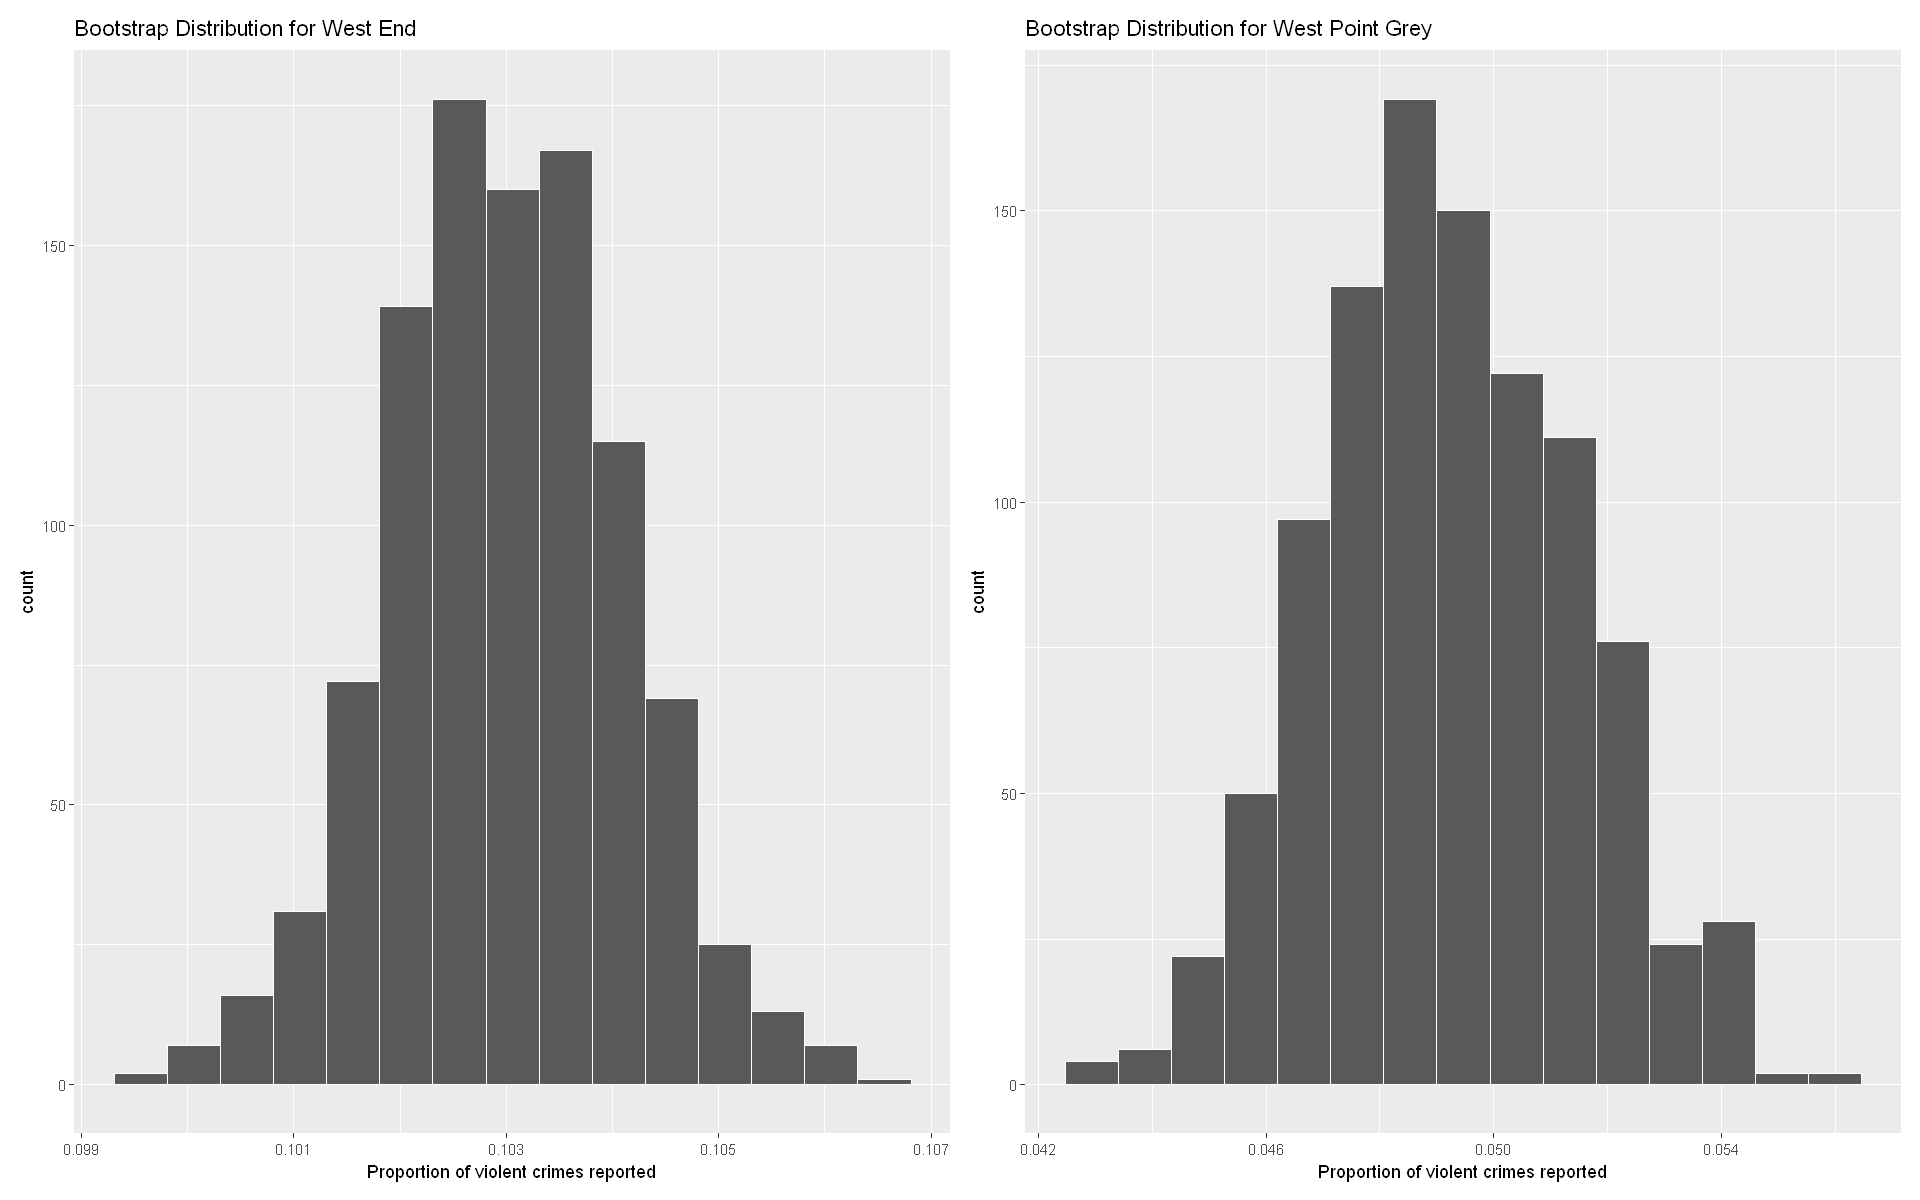

In [43]:
westpoint_crime <- westpoint_crime %>%
mutate(ViolentCrime = if_else(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "YES", "NO"))

westend_crime <- westend_crime %>%
mutate(ViolentCrime = if_else(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "YES", "NO"))

westpoint_violent_sample <-  westpoint_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
generate(type = "bootstrap", reps = 1000) %>% 
calculate(stat = "prop") 

westpoint_violent_sample_plot <- visualise(westpoint_violent_sample)+
labs(title = "Bootstrap Distribution for West Point Grey", x = "Proportion of violent crimes reported")

westend_violent_sample <-  westend_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
generate(type = "bootstrap", reps = 1000) %>% 
calculate(stat = "prop")

westend_violent_sample_plot <- visualise(westend_violent_sample) +
labs(title = "Bootstrap Distribution for West End", x = "Proportion of violent crimes reported")


plots(westend_violent_sample_plot, westpoint_violent_sample_plot)



## Methods : Plan

<p>
As mentioned, the goal of this project is to determine if population density and income level have an influence on the crime rate in areas of Vancouver, specifically West End and West Point Grey neighbourhoods. A random sample, representative of the neighbourhoods, has been taken from each of the two filtered datasets. These samples were then subject to bootstrapping and asymptotics to retrieve the sample proportion and the sample mean of each neighbourhood. After the repeated sampling performed in the previous section, it is expected that 90% of the resulting confidence intervals have captured the true population parameters for both neighbourhoods. While the statistics provided can help estimate the true population parameter, further testing—such as hypothesis testing—may be done to determine whether the data from the samples are statistically significant. Moreover, other sampling techniques may be experimented with to discover the possibility of having a more representative sample.</p>

<p>
The hypothesis test that will be done in this project will utilise a 90% confidence level and the hypothesis that higher density areas where the annual income of people is low will tend to be more dangerous (more crime) than areas with low population density and higher annual incomes. The test statistics for this will be sample means and sample proportions. More specifically, the mean quantity of violent crimes and the proportion of violent crimes to the cumulative quantity of crimes in the neighbourhoods. 
</p>
<p>
With this report, hopefully, individuals will be able to gain a sense of the safety levels in different areas in Vancouver, especially those who are new to the city. Moreover, individuals who plan to stay in Vancouver for a long period of time may take these results as a factor into their consideration when deciding on which area of Vancouver to reside or work in. Furthermore, future questions that may arise from this project may include, although not limited to, the following:<ul>
<li>How did the 2019 novel coronavirus affect the relationship among the population density, income level, and crime rate in Vancouver?</li>
<li>Which factor, whether population density or income level, has a stronger influence on the crime rate in Vancouver?</li></ul></p>


## References

<ol>
<li>VPD OPEN DATA. (2022). Retrieved 6 March 2022, from https://geodash.vpd.ca/opendata/</li>
<li>Census local area profiles 2016. (2022). Retrieved 6 March 2022, from https://opendata.vancouver.ca/explore/dataset/census-local-area-profiles-2016/information/</li>
</ol>
